In [108]:
%autoreload 2 
%matplotlib inline

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

In [110]:
from astroML.plotting import hist

In [111]:
from DataScienceToolBox import preprocessing as prep

In [112]:
import preprocess_data as prepData

In [113]:
dataPath1 = "/Users/karenyng/Documents/Research/code/" + \
    "RadioRelicData/MACSJ1752/"
dataPath2 = "./../../Data/Subaru_data/"

In [114]:
spec_df = pd.read_csv(dataPath1 + "macs1752_1_2_3_4.csv")

In [328]:
sources_df = pd.read_hdf(dataPath2 + "combined_cat.h5",
          "preprocess_df")

In [116]:
brightstar_wcs = (268.06539916992188, 44.668739318847656)

# just run script for matching catalogs

In [359]:
%run ./2_Match_and_separate_spectroscopic_members.py

21 out of 26 stars are matched within 2 arcsecs
obs only accepting quality == [3, 4] is 397, 82.88% remaining
No of accepted entries after all cuts = 397,    82.88%
Spec objects with nan RA or DEC = 3
371 out of 394 galaxies are matched within 2 arcsecs


In [360]:
combined_df = pd.read_hdf(dataPath2 + "combined_cat.h5", 
                          "sources_with_specz_df")

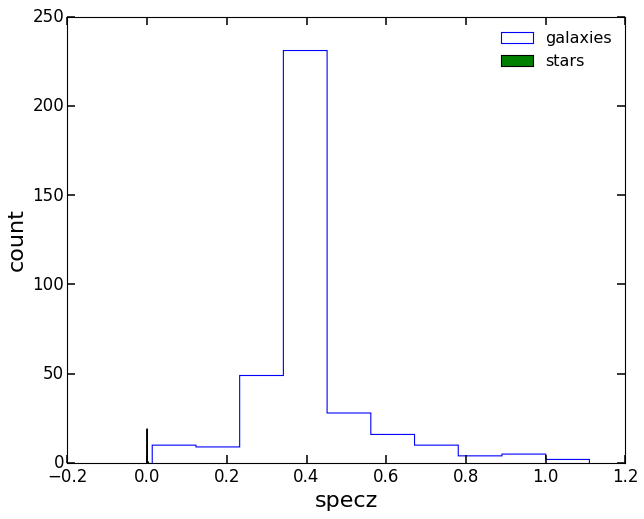

In [313]:
_ = hist(combined_df.specz[gal_mask], 
         histtype='step', label="galaxies")
_ = plt.hist(np.array(combined_df.specz[star_mask]), bins=3,
             label="stars")
plt.xlabel("specz")
plt.ylabel('count')
plt.legend(loc='best')

# start inspecting the catalog 

In [369]:
star_mask = combined_df.spec_quality == -1

In [363]:
gal_mask = np.logical_and(~np.isnan(combined_df.specz),
                          combined_df.spec_quality != -1)
gal_mask = np.logical_and(gal_mask,
                          ~np.isnan(combined_df.Iband_X_WORLD))

In [366]:
unmatched = np.logical_and(~np.isnan(combined_df.specz),
                           combined_df.spec_quality != -1)
unmatched = np.logical_and(unmatched,
                           np.isnan(combined_df.Iband_X_WORLD))

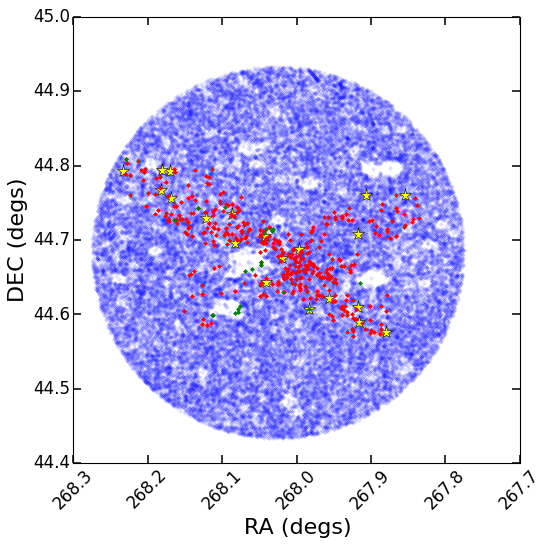

In [372]:
plt.axes().set_aspect('equal')
plt.plot(combined_df.Rband_X_WORLD,
         combined_df.Rband_Y_WORLD, 
         'b.', alpha=0.1, label="all sources")
plt.plot(combined_df.Rband_X_WORLD[star_mask],
         combined_df.Rband_Y_WORLD[star_mask],
         '*', color='yellow', label="spec stars",
         ms=12)
plt.plot(combined_df.Rband_X_WORLD[gal_mask],
         combined_df.Rband_Y_WORLD[gal_mask],
         'r.', label="spec galaxies")
plt.plot(combined_df.Rband_X_WORLD[unmatched],
         combined_df.Rband_Y_WORLD[unmatched],
         '.', color="g", label="unmatched galaxies")
# plt.plot(combined)

plt.xlim(plt.xlim()[::-1])
xticks = plt.xticks()
_ = plt.xticks(xticks[0], [str(t) for t in xticks[0]],
           rotation=45)
plt.xlabel("RA (degs)")
plt.ylabel("DEC (degs)")